# Tutorial: The Bias-Variance Tradeoff Revisited

Di chapter sebelumnya, kita melihat secara visual bagaimana ada "sweet spot" dalam kompleksitas model. Model yang terlalu sederhana (underfitting) dan model yang terlalu rumit (overfitting) sama-sama buruk. Fenomena ini dijelaskan oleh salah satu konsep paling fundamental dalam *supervised learning*: **The Bias-Variance Tradeoff**.

Memahami tradeoff ini akan memberi Anda kerangka berpikir yang kuat untuk mendiagnosis masalah pada model dan memilih strategi yang tepat untuk memperbaikinya, seperti regularisasi.

---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Mendefinisikan **Bias** dan **Variance** dalam konteks *machine learning*.
* Menjelaskan bagaimana **Bias** berhubungan dengan **underfitting**.
* Menjelaskan bagaimana **Variance** berhubungan dengan **overfitting**.
* Mengilustrasikan **tradeoff** (pertukaran) antara bias dan varians menggunakan learning curve.
* Memahami bahwa tujuan kita adalah meminimalkan **Total Error**, bukan hanya bias atau varians saja.


---
### 2. Apa itu Bias? (Kesalahan karena Kesederhanaan)

**Bias** adalah kesalahan yang berasal dari asumsi yang terlalu menyederhanakan oleh model. Model dengan bias tinggi "terlalu keras kepala" dan tidak cukup fleksibel untuk menangkap pola yang sebenarnya dalam data.

* **Bias Tinggi → Underfitting**

**Analogi: Seorang Detektif yang Malas**
Bayangkan seorang detektif yang menyelidiki sebuah kasus pembunuhan. Dia memiliki asumsi sederhana: "Pelakunya pasti kepala pelayan." Dia mengabaikan semua bukti lain—jejak kaki, alibi, motif—dan hanya fokus pada asumsinya. Karena asumsinya terlalu sederhana, dia kemungkinan besar akan salah menangkap orang.

Model Regresi Linear pada data non-linear adalah model dengan bias tinggi. Ia bersikeras bahwa hubungannya harus berupa garis lurus, mengabaikan bukti jelas bahwa polanya melengkung.


---
### 3. Apa itu Variance? (Kesalahan karena Kerumitan)

**Variance** adalah kesalahan yang berasal dari sensitivitas model yang berlebihan terhadap fluktuasi kecil (noise) dalam data pelatihan. Model dengan varians tinggi "terlalu panik" dan mencoba mencocokkan setiap titik data, termasuk noise acak.

* **Variance Tinggi → Overfitting**

**Analogi: Seorang Detektif yang Paranoid**
Bayangkan detektif lain yang menyelidiki kasus yang sama. Dia tidak punya asumsi, tetapi dia terobsesi dengan **setiap detail kecil**, tidak peduli seberapa tidak relevannya. Dia melihat bahwa saksi mata memakai topi merah dan menyimpulkan bahwa semua orang bertopi merah adalah tersangka. Teorinya sangat kompleks dan sangat cocok dengan detail-detail acak dari TKP, tetapi akan gagal total saat diterapkan pada kasus lain.

Model Regresi Polinomial dengan derajat 30 adalah model dengan varians tinggi. Ia sangat sensitif terhadap data pelatihan sehingga ia "menghafal" noise. Akibatnya, ia tidak dapat menggeneralisasi dengan baik pada data baru.


---
### 4. Visualisasi Tradeoff

*Learning curve* yang kita buat di chapter sebelumnya adalah ilustrasi sempurna dari Bias-Variance Tradeoff. Mari kita buat kembali dan menganalisisnya dari sudut pandang ini.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [21]:
sns.set_theme(style='whitegrid', context='talk')

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_errors, test_errors = [], []
degress = range(1,16)

for degree in degress:
    model = Pipeline(
        [
            ('poly', PolynomialFeatures(degree=degree)),
            ('lin_reg', LinearRegression())
        ]
    )
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    train_errors.append(np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

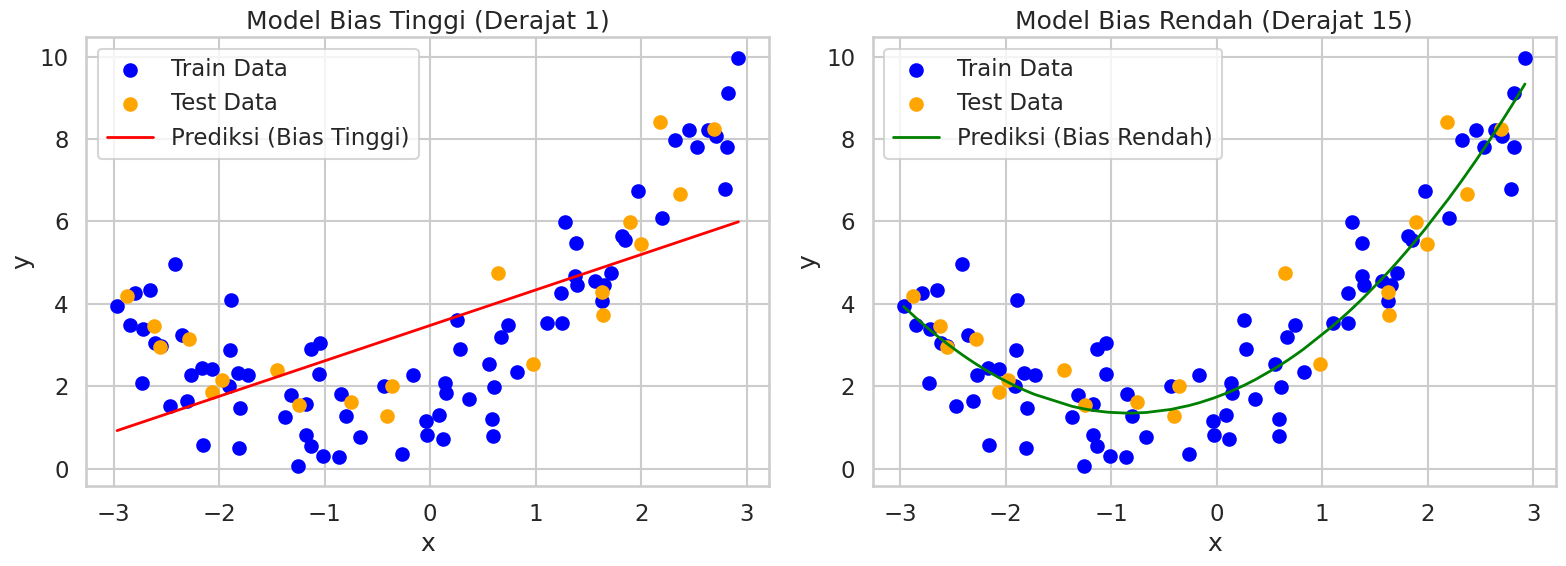

In [22]:
# Plot hasil prediksi pada data training dan test untuk
# model dengan bias tinggi (derajat rendah) dan bias rendah (derajat tinggi)
plt.figure(figsize=(16, 6))

# Model dengan bias tinggi (derajat 1)
model_bias_tinggi = Pipeline([
    ("poly", PolynomialFeatures(degree=1)),
    ("lin_reg", LinearRegression())
])
model_bias_tinggi.fit(X_train, Y_train)

y_train_pred_bias_tinggi = model_bias_tinggi.predict(X_train)
y_test_pred_bias_tinggi = model_bias_tinggi.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='orange', label='Test Data')
plt.plot(
    np.sort(X_train, axis=0),
    model_bias_tinggi.predict(np.sort(X_train, axis=0)),
    color='red', linewidth=2, label='Prediksi (Bias Tinggi)'
)
plt.title('Model Bias Tinggi (Derajat 1)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Model dengan bias rendah (derajat tinggi, misal 15)
model_bias_rendah = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])
model_bias_rendah.fit(X_train, Y_train)

plt.subplot(1, 2, 2)
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='orange', label='Test Data')
plt.plot(
    np.sort(X_train, axis=0),
    model_bias_rendah.predict(np.sort(X_train, axis=0)),
    color='green', linewidth=2, label='Prediksi (Bias Rendah)'
)
plt.title('Model Bias Rendah (Derajat 15)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

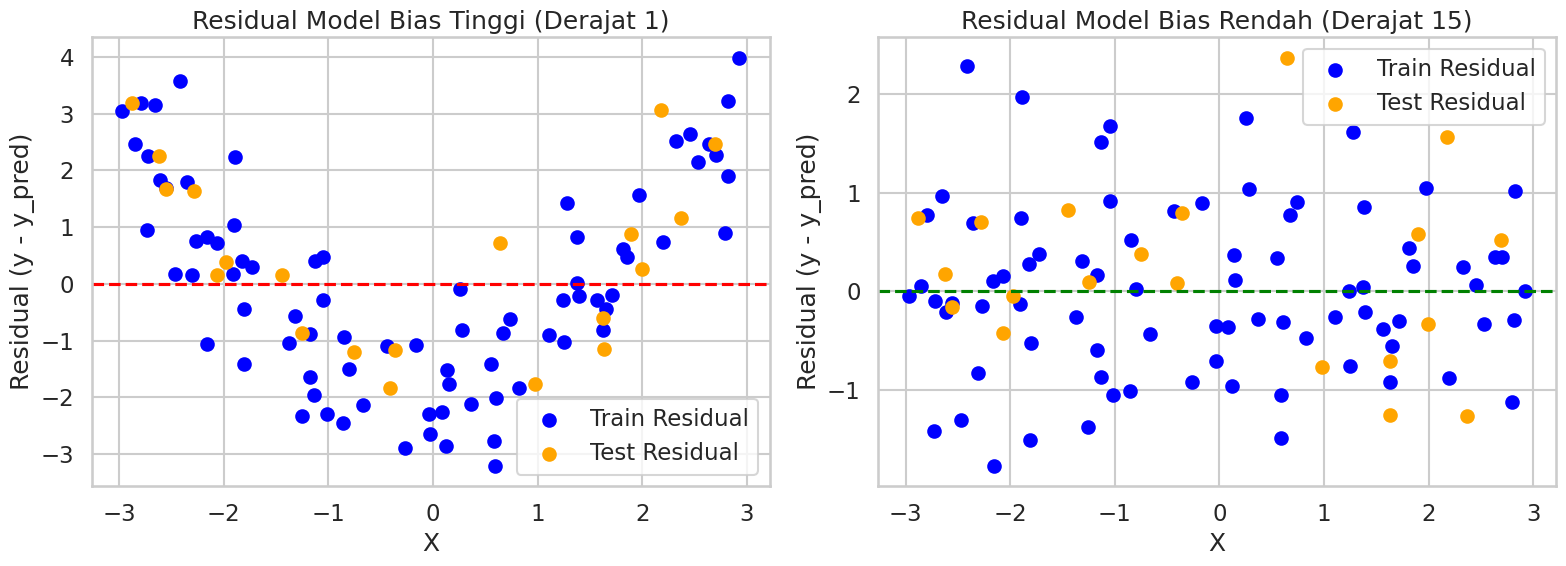

In [23]:
# Plot residual untuk model bias tinggi dan bias rendah
plt.figure(figsize=(16, 6))

# Residual untuk model bias tinggi (derajat 1)
residual_train_bias_tinggi = Y_train - y_train_pred_bias_tinggi
residual_test_bias_tinggi = Y_test - y_test_pred_bias_tinggi

plt.subplot(1, 2, 1)
plt.scatter(X_train, residual_train_bias_tinggi, color='blue', label='Train Residual')
plt.scatter(X_test, residual_test_bias_tinggi, color='orange', label='Test Residual')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Model Bias Tinggi (Derajat 1)')
plt.xlabel('X')
plt.ylabel('Residual (y - y_pred)')
plt.legend()

# Residual untuk model bias rendah (derajat 15)
residual_train_bias_rendah = Y_train - Y_train_pred
residual_test_bias_rendah = Y_test - Y_test_pred

plt.subplot(1, 2, 2)
plt.scatter(X_train, residual_train_bias_rendah, color='blue', label='Train Residual')
plt.scatter(X_test, residual_test_bias_rendah, color='orange', label='Test Residual')
plt.axhline(0, color='green', linestyle='--')
plt.title('Residual Model Bias Rendah (Derajat 15)')
plt.xlabel('X')
plt.ylabel('Residual (y - y_pred)')
plt.legend()

plt.tight_layout()
plt.show()

#### **Analisis Plot:**

* **Sisi Kiri (Kompleksitas Rendah):**
  * Modelnya sederhana (misal, garis lurus). Ia memiliki **Bias Tinggi** (karena tidak bisa menangkap kurva) dan **Variance Rendah** (karena jika kita melatihnya pada data sampel yang berbeda, garisnya tidak akan banyak berubah). Error totalnya tinggi karena dominasi Bias.

* **Sisi Kanan (Kompleksitas Tinggi):**
  * Modelnya sangat rumit. Ia memiliki **Bias Rendah** (karena bisa mencocokkan data pelatihan dengan sangat baik) tetapi **Variance Tinggi** (karena jika kita melatihnya pada data sampel yang sedikit berbeda, kurvanya akan berubah secara drastis untuk "mengejar" noise baru). Error totalnya tinggi karena dominasi Variance.

* **Titik Terendah di Tengah:**
  * Ini adalah "sweet spot" kita. Di sinilah kita menemukan **keseimbangan terbaik** antara Bias dan Variance, yang menghasilkan **Total Error terendah** pada data pengujian.

---
### 5. Tujuan Akhir: Meminimalkan Total Error

Secara konseptual, total error dari sebuah model dapat dipecah menjadi tiga bagian:

> **Total Error = Bias² + Variance + Irreducible Error**

* **Irreducible Error (Kesalahan yang Tidak Dapat Direduksi):** Ini adalah noise acak yang melekat dalam data itu sendiri. Tidak ada model, seberapa pun canggihnya, yang bisa menghilangkan error ini.

Tugas kita sebagai praktisi *machine learning* bukanlah untuk menghilangkan bias atau varians sepenuhnya (karena itu tidak mungkin), melainkan untuk menemukan titik di mana **kombinasi keduanya paling minimal**.

### Hubungan dengan Regularisasi

**Regularisasi** adalah sebuah teknik yang secara eksplisit dirancang untuk mengelola tradeoff ini. Cara kerjanya adalah dengan **menambahkan "penalti" untuk kompleksitas model** ke dalam proses pelatihan.

Dengan kata lain, regularisasi memaksa model untuk menjaga koefisiennya tetap kecil. Ini secara efektif **meningkatkan sedikit bias** (model menjadi sedikit lebih sederhana) dengan imbalan **penurunan varians yang signifikan** (model menjadi kurang sensitif terhadap noise). Hasilnya, kita bisa menggeser model dari zona overfitting kembali ke "sweet spot".

**Selanjutnya:**
Di subchapter berikutnya, kita akan belajar teknik regularisasi pertama kita: **Ridge Regression (L2 Regularization)**.